In [2]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import random

In [2]:
from datasets import load_dataset
datasets = load_dataset('smilegate-ai/kor_unsmile')

Using custom data configuration smilegate-ai--kor_unsmile-e0f75c6e3be1af78
Reusing dataset parquet (/Users/sonak_bee/.cache/huggingface/datasets/parquet/smilegate-ai--kor_unsmile-e0f75c6e3be1af78/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
from transformers import TextClassificationPipeline, BertForSequenceClassification, AutoTokenizer
model_name = 'smilegate-ai/kor_unsmile'
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
pipe = TextClassificationPipeline(
        model = model,
        tokenizer = tokenizer,
        device = -1,   # cpu: -1, gpu: gpu number
        return_all_scores = True,
        function_to_apply = 'sigmoid'
    )



In [4]:
df3 = pd.read_csv('/Users/sonak_bee/Desktop/국힘/국민의 힘.csv', encoding='utf-8')

In [1]:
df3 = df3.dropna(axis=0)

NameError: name 'df3' is not defined

In [5]:
result1 = []
for t in df3['Text'].astype(str):
    result1.extend(pipe(t))

In [6]:
label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

In [7]:
score = [[item['score'] for item in i] for i in result1]
score = np.round(score,2)

In [8]:

# df에 text열 추가 - 텍스트와 같이 보고 싶을 경우
new_df = pd.DataFrame(score, columns=label)
new_df['result'] = new_df.idxmax(axis = 1)
new_df.insert(0, 'text', df3['Text']) # 앞에 숫자가 순서(왼쪽->오른쪽)

new_df.head()

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
0,@wonheeryong 이전 새누리당으로 돌아가지 마십시오! 경선때 보여주신 모습이...,0.01,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.05,0.90,clean
1,오늘은 대통령선거와 함께 국회의원 재·보궐선거가 전국 5개 지역구에서 치러지고 있습...,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.08,0.89,clean
2,더불어민주당 이재명 후보와 국민의힘 윤석열 후보는 각각 그제와 어제 대전을 잇따라 ...,0.01,0.01,0.01,0.02,0.01,0.03,0.01,0.01,0.06,0.88,clean
3,"""난 페미니스트"" 윤석열 외신 인터뷰..부인하다 딱걸린 국민의힘 | 다음뉴스 htt...",0.03,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.14,0.81,clean
4,대체 국민의힘에서 무슨 일이 벌어지고 있는 걸까?\n\n1) 설마 외신과 국민 면전...,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.27,0.72,clean


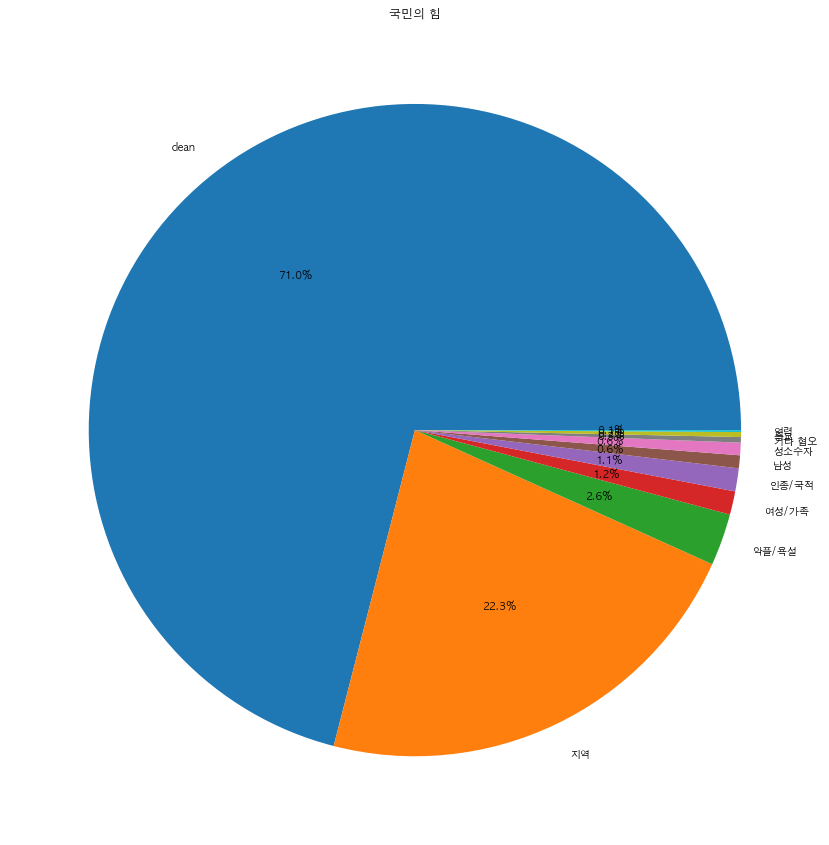

In [9]:
plt.rcParams['font.family'] = 'AppleGothic'
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plt.title('국민의 힘')
plt.pie(new_df['result'].value_counts()/len(new_df),
        labels = new_df['result'].unique(),
        autopct = '%.1f%%')
plt.show()

In [10]:
new_df.to_csv("./국민의 힘_unsmile.csv", encoding='utf-8-sig',sep=',', index=False)

In [11]:
rg = new_df[new_df['지역']>=0.60]

In [158]:
del rg["selected_text"]
del rg["temp_list"]
rg[:20]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
14,국민의힘 특보 “전라도인들 거지 거렁뱅이 인생” 호남에서 얻겠다더니… 대선 막판...,0.02,0.02,0.02,0.04,0.02,0.93,0.02,0.04,0.04,0.05,지역
37,국민의힘 특보가 전라도인에 ˝불쌍한 인생들 거지 거렁뱅이 비천˝ 막말,0.02,0.02,0.02,0.04,0.02,0.94,0.02,0.05,0.04,0.04,지역
51,대선 투표 하기 전 국민의힘 보수가 가장 존경하는 대통령들이 학살 성폭행 강제징용 ...,0.02,0.02,0.02,0.08,0.01,0.91,0.02,0.02,0.03,0.08,지역
59,대선 투표 하기 전 대구 울산 부산 창원 경상도 사람들 국민의힘 보수가 존경하는 대...,0.01,0.02,0.02,0.04,0.01,0.88,0.02,0.02,0.04,0.13,지역
129,지금 윤석열의 지지는 윤석열에 대한 지지가 아니라 국민의 힘에 대한 지지입니다 국민...,0.01,0.02,0.02,0.05,0.01,0.88,0.02,0.02,0.03,0.11,지역
135,이중선 전 행정관 “국민의힘 선대본 특보 전라도인을 거렁뱅이 취급 전두환 수준”,0.02,0.02,0.02,0.05,0.02,0.95,0.03,0.04,0.03,0.05,지역
447,대선 투표 하기 전 대구 울산 부산 창원 경상도 사람들 국민의힘 보수가 존경하는 대...,0.01,0.01,0.01,0.02,0.01,0.67,0.01,0.02,0.06,0.30,지역
460,국민의힘 특보가 전라도인에 ˝불쌍한 인생들 거지 거렁뱅이 비천˝ 막말,0.02,0.02,0.02,0.05,0.02,0.94,0.02,0.04,0.04,0.04,지역
465,윤석열 대구 텃밭 민심 호소…與에 또 국정 맡기면 나라 망해선거 네거티브로 막판 ...,0.01,0.01,0.01,0.02,0.01,0.61,0.01,0.02,0.10,0.16,지역
536,난 국민의힘 당을 극도로 싫어한다광주 학생운동 위안부 문제에 언제나 부정적이었고 독...,0.01,0.01,0.02,0.05,0.01,0.83,0.03,0.03,0.05,0.07,지역


In [13]:
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
rg['text'] = rg['text'].apply(lambda x:clean_text(x))
rg['selected_text'] = rg['text'].apply(lambda x:clean_text(x))

In [19]:
rg['temp_list'] = rg['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in rg['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,국민의힘,142
1,윤석열,58
2,경상도,31
3,대선,30
4,전,30
5,국민의,26
6,대통령,21
7,거렁뱅이,20
8,학살,20
9,대구,20


In [16]:
def remove_stopword(x):
    return [y for y in x if y not in ['것','정의당은','정의당이','그','더','다','표','안','거','수','게','위해','좀','진짜','하는','왜']]
rg['temp_list'] = rg['selected_text'].apply(lambda x:remove_stopword(x))

In [170]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [171]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [23]:
dtd = rg[rg['text'].str.contains('윤석열')]
del dtd["selected_text"]
del dtd["temp_list"]
dtd[:20]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
129,지금 윤석열의 지지는 윤석열에 대한 지지가 아니라 국민의 힘에 대한 지지입니다 국민...,0.01,0.02,0.02,0.05,0.01,0.88,0.02,0.02,0.03,0.11,지역
465,윤석열 대구 텃밭 민심 호소…與에 또 국정 맡기면 나라 망해선거 네거티브로 막판 ...,0.01,0.01,0.01,0.02,0.01,0.61,0.01,0.02,0.10,0.16,지역
975,국민의힘 대선후보 기호 윤석열· 국민의당 대표 안철수등장에 화성 동탄신도시 난리났...,0.02,0.01,0.02,0.03,0.01,0.77,0.02,0.07,0.06,0.07,지역
1175,국민을 개돼지로 보는 국민의힘의 민낯인가 유족들과 광주민주화 관계자 그리고 전라도...,0.01,0.01,0.02,0.03,0.01,0.82,0.02,0.04,0.11,0.05,지역
1545,충북 여성유권자모임 “국민의힘 윤석열 지지”,0.06,0.03,0.02,0.07,0.01,0.76,0.01,0.03,0.03,0.23,지역
1628,국민의힘 무공천 지역 무소속 후보들 윤석열 일색 국회의원보궐선거 중구남구 정만진 기자,0.01,0.02,0.02,0.03,0.01,0.65,0.01,0.02,0.04,0.28,지역
1664,성남지역 서민단체연대회의 국민의힘 윤석열 대선후보 지지선언 출처 youtube,0.02,0.05,0.03,0.06,0.01,0.70,0.01,0.02,0.03,0.18,지역
1896,대구맘 난리났어요 뉴스타파ㄷㄷ 윤석열이 제주도를 포기한 이유ㄷㄷ 출처 youtub...,0.01,0.01,0.01,0.06,0.01,0.67,0.02,0.02,0.05,0.18,지역
2125,윤석열 그러면 국민의힘과 멋지게 협치할 수 있는 것입니다 전라도 경상도 충청도가 어...,0.01,0.01,0.02,0.03,0.01,0.75,0.02,0.02,0.03,0.22,지역
2798,bulkoturi 나 경상도 토종인데경상도 사람들은 뇌를 땅속에 묻어놓고 사는 사람...,0.01,0.02,0.02,0.07,0.02,0.90,0.02,0.03,0.04,0.04,지역


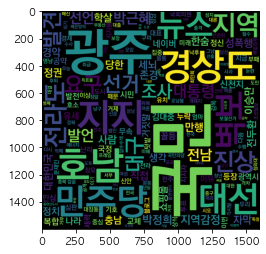

In [51]:
text = str(dtd['text'].values)

nouns = okt.nouns(text) # 명사만 추출

words1 = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제

c = Counter(words1) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
ignore = ['심상정', '정의당', '출처', '후보', '이재명', '안철수', '허경영', '제발','윤석열'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] 
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [24]:
female= new_df[new_df['여성/가족']>=0.60]

In [25]:
female['text'] = female['text'].apply(lambda x:clean_text(x))
female['selected_text'] = female['text'].apply(lambda x:clean_text(x))

In [32]:
def remove_stopword(x):
    return [y for y in x if y not in ['것','한','하는','왜','안','한다']]
female['temp_list'] = female['selected_text'].apply(lambda x:remove_stopword(x))

In [34]:
female['temp_list'] = female['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in female['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,국민의힘,49
1,윤석열,43
2,여성,20
3,국민의,18
4,폐지,16
5,여성가족부,12
6,안티,12
7,여가부,11
8,페미니즘,10
9,한,10


In [35]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np


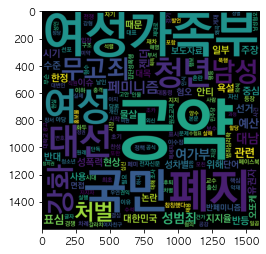

In [53]:
text = str(ff['text'].values)

nouns = okt.nouns(text) # 명사만 추출

words1 = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제

c = Counter(words1) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
ignore = ['심상정', '정의당', '출처', '후보', '윤석열', '이재명', '안철수', '허경영', '제발'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] 
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [54]:
male = new_df[new_df['남성']>=0.60]
male

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
70,"@papercloudbooks ""심상정은 국민의힘 나경원보다 여성인권에 관심이 없다...",0.17,0.69,0.01,0.02,0.01,0.02,0.01,0.03,0.10,0.04,남성
539,"“윤석열 페미니스트 아니다”…국민의힘, 황급한 뒷수습 왜? (출처 : 한겨레 | 네...",0.04,0.90,0.03,0.03,0.04,0.02,0.01,0.05,0.09,0.05,남성
749,여성의날에 다시 보는 국민의힘의 '여혐' 대선 TV 광고. 2번남들을 위해 역사에 ...,0.11,0.63,0.02,0.03,0.01,0.02,0.00,0.02,0.11,0.09,남성
1051,군부독재를 경험하지 못한 이대남들아!! 국민의힘의 뿌리는 민주정의당이란다. 민주정의...,0.02,0.76,0.02,0.13,0.03,0.02,0.01,0.03,0.06,0.05,남성
1291,국민의힘은 펨코본다면서 왜 안쓰는거지????🤔🤔🤔🤔\n펨코남들 서운하게~~🤣🤣🤣🤣\...,0.03,0.86,0.06,0.05,0.01,0.02,0.01,0.02,0.08,0.08,남성
1471,이번남들~\n\n국민의힘\n윤석열이 걸어온 길\n김건희가 걸어온 길 만큼 가관임.....,0.03,0.89,0.02,0.03,0.02,0.03,0.01,0.02,0.07,0.07,남성
2077,"""신남성연대"" 배인규 (2번남들)와 국민의힘 관계자들의 연관성!!! 조직적으로 댓...",0.04,0.64,0.05,0.04,0.01,0.05,0.00,0.03,0.07,0.09,남성
2409,이번남들~\n\n불법과 탈법을 넘나들며\n'검사 기소권'으로 사익을 추구하는\n\n...,0.03,0.91,0.03,0.07,0.02,0.04,0.01,0.02,0.05,0.05,남성
2507,이번남들~\n\n윤석열은\n왜 저축은행 대출비리를 봐줬을까? \n\n우연히 우연히 ...,0.03,0.86,0.02,0.03,0.02,0.03,0.01,0.02,0.07,0.08,남성
2536,여러분 윤석열과 국민의 힘은 여성들이 이준석과 펨코남들의 여혐에 맞서 민주당과 이재...,0.09,0.70,0.04,0.08,0.01,0.01,0.01,0.01,0.06,0.06,남성


In [165]:
male['text'] = male['text'].apply(lambda x:clean_text(x))
male['selected_text'] = male['text'].apply(lambda x:clean_text(x))
male['temp_list'] = male['selected_text'].apply(lambda x:str(x).split())
male['temp_list'] = male['temp_list'].apply(lambda x:remove_stopword(x))

In [166]:
top = Counter([item for sublist in male['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,국민의힘,7
2,국민의,6
3,늙은,6
4,윤석열,5
5,대통령,4
6,국민의힘의,3
7,윤석열과,3
8,나는,3
9,뿌리는,2
10,이재명,2


In [167]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [169]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [75]:
minor = new_df[new_df['성소수자']>=0.60]

In [80]:
minor['text'] = minor['text'].apply(lambda x:clean_text(x))
minor['selected_text'] = minor['text'].apply(lambda x:clean_text(x))
minor['temp_list'] = minor['selected_text'].apply(lambda x:str(x).split())
minor['temp_list'] = minor['temp_list'].apply(lambda x:remove_stopword(x))

In [78]:
def remove_stopword(x):
    return [y for y in x if y not in ['국민의','gt','너무','그','더','다','표','안','거','수','게','ㅠㅠ','것','진짜','하는','왜','합니다','아닌','하고']]
minor['temp_list'] = minor['selected_text'].apply(lambda x:remove_stopword(x))

In [81]:
top = Counter([item for sublist in minor['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,외국인,2
2,혐오,2
3,있다,2
4,성소수자,2
5,노동자,2
6,다양한,2
7,대통령,2
8,성인지,2
9,위치에,2
10,힘이,1


In [19]:
df3 = pd.read_csv('/Users/sonak_bee/Desktop/국힘/국민의 힘.csv', encoding='utf-8')

In [20]:
import os
import re
import platform

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from datetime import datetime
from tqdm import tqdm
from collections import Counter
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 그래프 파일 저장
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 한글 폰트 설정
def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [21]:
df3 = df3[~df3['Datetime'].str.contains("joongangilbo", na=False, case=False)]

In [22]:
df3['date'] = pd.to_datetime(df3['Datetime']).apply(lambda x: x.date())
df3['date_re'] = df3['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/Users/sonak_bee/miniforge3/envs/sonak/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sonak_bee/miniforge3/envs/sonak/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sonak_bee/miniforge3/envs/sonak/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sonak_bee/miniforge3/envs/sonak/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sonak_bee/miniforge3/envs/sonak/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4

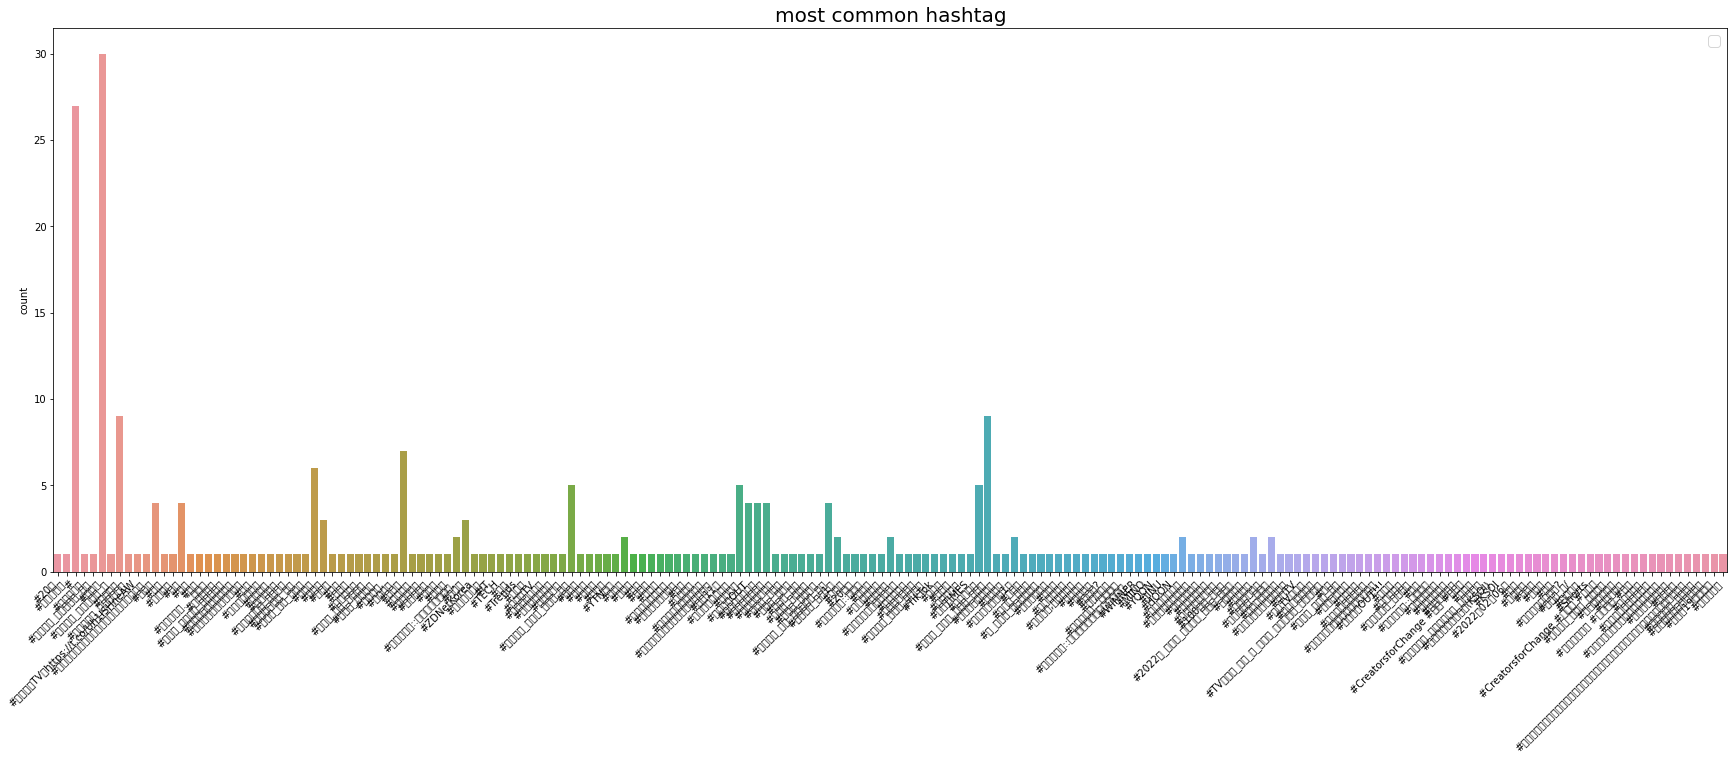

In [23]:
texts = df3[df3['Text'].apply(lambda x : x.startswith('#'))]
texts['Text'] = texts['Text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
texts['Text'] = texts['Text'].apply(lambda x: ' '.join(x))
texts['Text'] = texts['Text'].str.split(' ').apply(lambda x : [i for i in x if i.startswith('#') ])

word_of_Bag = sum(texts['Text'], [])

plt.figure(figsize=(30,10))
plot = sns.countplot(word_of_Bag)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
# save_fig('most common hashtag')

In [153]:
df3['tokenizing'] = df3['Text'].apply(lambda x:str(x).split())

In [154]:
def remove_stopword(x):
    return [y for y in x if y not in ['이재명','또','대선','후보','힘','윤석열','국민의힘','국민의 힘','|','국힘','국힘당','국민의','gt','너무','그','더','다','표','안','거','수','게','ㅠㅠ','것','진짜','하는','왜','합니다','아닌','하고']]

In [155]:
df3['tokenizing'] = df3['tokenizing'].apply(lambda x:remove_stopword(x))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


그림 저장: most common word by date


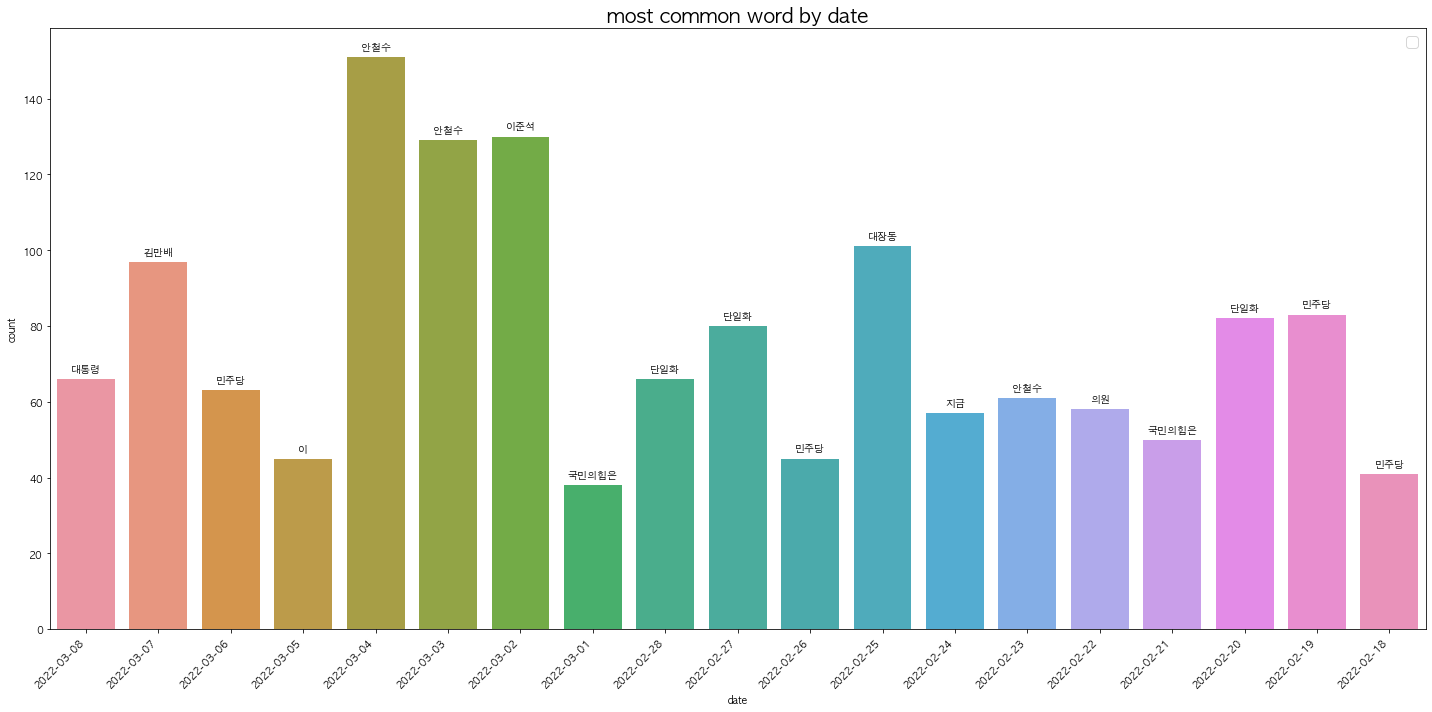

In [156]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def add_value_labels(ax, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(df3['word'][idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)

date = []
word_list = []
count_list = []

for i in df3['date_re'].unique():
    tokenizing = sum(df3[df3['date_re'] == i]['tokenizing'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
df3 = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(df3['date'], df3['count'])
add_value_labels(ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date")

In [160]:
df3 = pd.read_csv('/Users/sonak_bee/Desktop/국힘/국민의 힘.csv', encoding='utf-8')

In [161]:
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)

df3['hash']=df3['Text'].apply(lambda x:find_hash(x))
temp=df3['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
plt.figure(figsize = (65,20))
sns.barplot(x="Hashtag",y="count", data = temp)

TypeError: expected string or bytes-like object